In [1]:
# Importar las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### PRE-PROCESAMIENTO

In [40]:
# Cargar el Dataframe
df_user_items = pd.read_csv("C:/Users/Usuario/Desktop/Varios yo/SoyHenry/P1/Henry_PI1_Steam/data/user_items_2.csv")
df_user_items

,item_id,item_name,playtime_forever,user_id
0,10,Counter-Strike,6,76561197970982479
1,20,Team Fortress Classic,0,76561197970982479
2,30,Day of Defeat,7,76561197970982479
3,40,Deathmatch Classic,0,76561197970982479
4,50,Half-Life: Opposing Force,0,76561197970982479
...,...,...,...,...
5153204,346330,BrainBread 2,0,76561198329548331
5153205,373330,All Is Dust,0,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,76561198329548331


In [41]:
print(df_user_items.isna().sum())

item_id             0
item_name           0
playtime_forever    0
user_id             0
dtype: int64


In [42]:
# Eliminar duplicados si los hay
df_user_items.drop_duplicates(inplace=True)

In [43]:
df_user_items.shape

(5094092, 4)

### EDA PLAYTIME_FOREVER

In [44]:
df_user_items['playtime_forever'].info()

<class 'pandas.core.series.Series'>
Index: 5094092 entries, 0 to 5153208
Series name: playtime_forever
Non-Null Count    Dtype
--------------    -----
5094092 non-null  int64
dtypes: int64(1)
memory usage: 77.7 MB


In [45]:
df_user_items['playtime_forever'].describe()

count   5094092.00
mean        990.51
std        5414.11
min           0.00
25%           0.00
50%          34.00
75%         355.00
max      642773.00
Name: playtime_forever, dtype: float64

In [46]:
df_user_items['playtime_forever'].value_counts()

playtime_forever
0        1847730
1         101586
2          34391
3          31530
4          29127
          ...   
64676          1
53328          1
44029          1
33119          1
34753          1
Name: count, Length: 48861, dtype: int64

El dato central y único de este dataset es el tiempo de juego, se observa que hay cerca de 2 millones de registros en cero. Los voy a eliminar porque no aportan nada, ya que no me interesa conocer los usuarios que no jugaron.

In [47]:
df_user_items = df_user_items[df_user_items['playtime_forever'] != 0]

In [48]:
df_user_items.shape

(3246362, 4)

In [49]:
# Cambiar la notación científica a notación normal
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# pd.reset_option('display.float_format')

In [50]:
estadisticas = df_user_items['playtime_forever'].describe()
estadisticas

count   3246362.00
mean       1554.28
std        6717.15
min           1.00
25%          44.00
50%         205.00
75%         808.00
max      642773.00
Name: playtime_forever, dtype: float64

Análisis de Outliers:

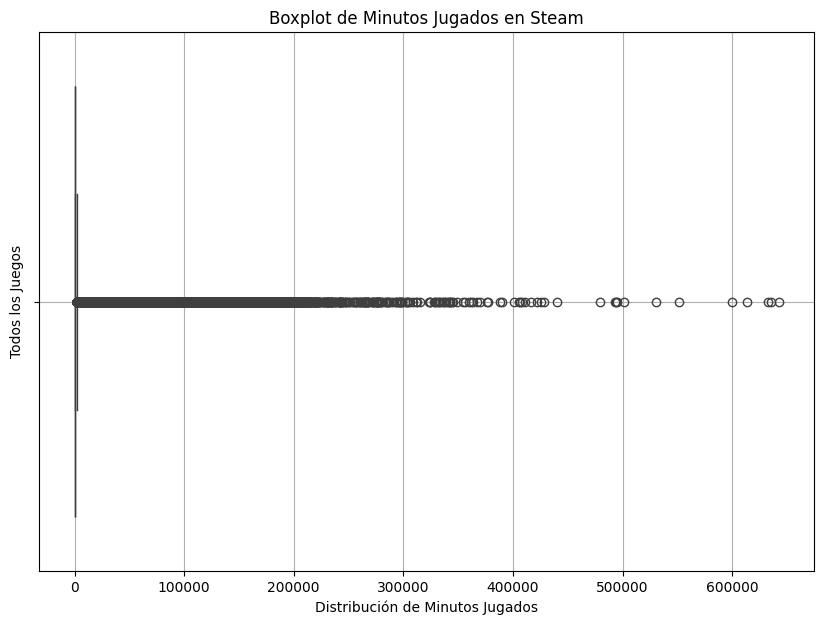

In [51]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 7))
sns.boxplot(x=df_user_items['playtime_forever'])

# Configurar etiquetas y título
plt.xlabel('Distribución de Minutos Jugados')
plt.ylabel('Todos los Juegos')
plt.title('Boxplot de Minutos Jugados en Steam')

# Mostrar el gráfico
plt.grid()
plt.show()

### El Boxplot no permite apreciar nada útil

In [52]:
q1 = estadisticas.loc["25%"]
q3 = estadisticas.loc["75%"]

In [53]:
limite = q3 + (1.5 * (q3 - q1))
limite

1954.0

In [54]:
df_user_items2 = df_user_items[df_user_items['playtime_forever'] <= 1954]
df_user_items2.shape

(2814998, 4)

Con este criterio pierdo un poco más del 10% de los registros como outliers. Voy a ajustar manualmente el punto de corte. Considero que un jugador promedio juega 1 hora por día por 5 días a la semana por 4.33 semanas al mes por 3 meses, eso da una cuenta de 3897 minutos. Más allá de eso lo tomo como outlier.

In [55]:
df_user_items3 = df_user_items[df_user_items['playtime_forever'] < 3897]
df_user_items3.shape

(3004632, 4)

Con esto descarté un 8% de los datos. Lo doy por finalizado.

In [56]:
# Exportar el Dataframe a .csv eliminando el índice
df_user_items3.to_csv("data/user_items_3.csv", index=False)

In [57]:
# Verificar el .csv
df = pd.read_csv("data/user_items_3.csv")
df

,item_id,item_name,playtime_forever,user_id
0,10,Counter-Strike,6,76561197970982479
1,30,Day of Defeat,7,76561197970982479
2,240,Counter-Strike: Source,1853,76561197970982479
3,3830,Psychonauts,333,76561197970982479
4,2630,Call of Duty 2,75,76561197970982479
...,...,...,...,...
3004627,304930,Unturned,677,76561198329548331
3004628,227940,Heroes & Generals,43,76561198329548331
3004629,388490,One Way To Die: Steam Edition,3,76561198329548331
3004630,521570,You Have 10 Seconds 2,4,76561198329548331
